In [6]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import *
from qiskit.compiler import transpile, assemble
#from qiskit.tools.jupyter import *
from qiskit.visualization import *

import sys
import types
import pip
import numpy as np
import math
import pandas as pd

pi = math.pi

#Connection with IBM Q systems (both physical and simulation)

# Loading your IBM Q account(s)
#provider = IBMQ.enable_account("ae8391a1a33ccce9dd6d6325d97376c0f556f9f41393432911fff43ea587facf35562fdc0ed1be834d8e10453503622bad7a5b54135e85fafdaca7410bfd7a56")
import getpass, time
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, Aer, IBMQ

# import basic plot tools
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.visualization import iplot_histogram

backend = Aer.get_backend("qasm_simulator")

df_data_1 = pd.read_csv("DataForQComparison.csv")
df_data_1.head()
dataset=df_data_1
dataset["Teta"]=np.arctan(dataset["Annual Income_k$"].values.astype(int)/dataset["Spending Score_1_to_100"].values.astype(int))
dataset["ID"]=dataset.reset_index().index
dataset.head(10)
dataset.shape

# Creating Quantum Circuit called “qc” involving your Quantum Register “qr”
# and your Classical Register “cr”
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit ( qr, cr, name="k_means")

#Circuit test
#from the dataset we get the first and the 7th theta valuest
i=0
j=7

theta_1 = dataset.at[i,"Teta"]
theta_2 = dataset.at[i+j,"Teta"]#Compose the quantum circuit via qiskit
#apply the first Hadamard gate to the ancilla qubit
qc.h(qr[1])
#apply the U3 gates to the controlled qubits
qc.u3(theta_1, pi, pi, qr[0])
qc.u3(theta_2, pi, pi, qr[2])
#apply the c-swap circuit
qc.cswap(qr[1], qr[0], qr[2])
#apply the second Hadamard gate to the ancilla qubit
qc.h(qr[1])
#make the measurement
qc.measure(qr[1], cr[1])

job_exp = execute(qc, backend=backend, shots=4096)
result = job_exp.result()
print(result)

Result(backend_name='qasm_simulator', backend_version='0.3.4', date=datetime.datetime(2019, 12, 12, 17, 34, 52, 696315), header=Obj(backend_name='qasm_simulator', backend_version='0.3.4'), job_id='5014a472-66bd-4163-b1d5-749ae9d00ec3', metadata={'max_memory_mb': 1899, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.008918820000000001}, qobj_id='6f5d60cb-b95b-4f76-a929-4d242b649864', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=3362, 0x2=734)), header=Obj(clbit_labels=[['c3', 0], ['c3', 1], ['c3', 2]], creg_sizes=[['c3', 3]], memory_slots=3, n_qubits=3, name='k_means', qreg_sizes=[['q3', 3]], qubit_labels=[['q3', 0], ['q3', 1], ['q3', 2]]), meas_level=<MeasLevel.CLASSIFIED: 2>, metadata={'measure_sampling': True, 'method': 'statevector', 'parallel_shots': 1, 'parallel_state_update': 4}, seed_simulator=2095138056, shots=4096, status='DONE', success=True, time_taken=0.008795180000000001)], status='COMPLETED', success=True, time_taken=0.017569780349731

In [5]:
circuit_drawer(qc)

In [ ]:
print(result.get_counts(qc))
plot_histogram(result.get_counts(qc))

In [10]:
# State vector visualizing

#state_vec_sim_bck=”statevector_simulator”
state_vec_sim_bck=Aer.get_backend("statevector_simulator")

n = 3 # number of qubits
q = QuantumRegister(n)
c = ClassicalRegister(n)

i=0
j=7

qc = QuantumCircuit(q, c, name="State_super")
#theta_1 = dataset.at[i,’Teta’]theta_1=0
Theta_2=2
#theta_2 = dataset.at[i+j,’Teta’]#Compose the quantum circuit via qiskit
qc.h(q[1])
qc.h(q[0])
qc.h(q[2])

qc.u3(theta_1, pi, pi, q[0])
qc.u3(theta_2, pi, pi, q[2])
qc.cswap(q[1], q[0], q[2])
qc.h(q[1])

# execute the quantum circuit
job = execute(qc, backend=state_vec_sim_bck)
state_superposition = job.result().get_statevector(qc)

#The overall matrix defining the whole circuit
#_Coefficients_

def overlap(state1, state2):
     return round(np.dot(state1.conj(), state2))

print(state_superposition)

overlap(state_superposition, state_superposition)


#_probability density_

def state_2_rho(state):
    return np.outer(state, state.conj())

rho_superposition=state_2_rho(state_superposition)
print(rho_superposition)

 

rho_superposition=state_2_rho(state_superposition)

print(rho_superposition)

[ 7.69467860e-01-9.95701679e-17j  3.41149668e-01-1.31167998e-16j
  3.21187199e-33+4.71163176e-17j  2.94685298e-01-6.93319593e-17j
  3.41149668e-01-1.67256538e-16j  3.83949385e-02-5.82358684e-17j
 -2.94685298e-01+1.11110744e-16j  3.42196053e-33+2.35101193e-18j]
[[ 5.92080787e-01+0.00000000e+00j  2.62503705e-01+6.69612286e-17j
  -2.21994738e-33-3.62544920e-17j  2.26750865e-01+2.40068497e-17j
   2.62503705e-01+9.47302008e-17j  2.95436711e-02+4.09876385e-17j
  -2.26750865e-01-5.61542819e-17j  2.39899799e-33-1.80902811e-18j]
 [ 2.62503705e-01-6.69612286e-17j  1.16383096e-01+0.00000000e+00j
  -5.08442396e-33-1.60737161e-17j  1.00531792e-01-1.50007055e-17j
   1.16383096e-01+1.23115937e-17j  1.30984205e-02+1.48309600e-17j
  -1.00531792e-01+7.47886956e-19j  8.59023171e-34-8.02046938e-19j]
 [-2.21994738e-33+3.62544920e-17j -5.08442396e-33+1.60737161e-17j
   2.21994738e-33+0.00000000e+00j -2.32017516e-33+1.38844861e-17j
  -6.78478311e-33+1.60737161e-17j -2.62054004e-33+1.80902811e-18j
   4.288637

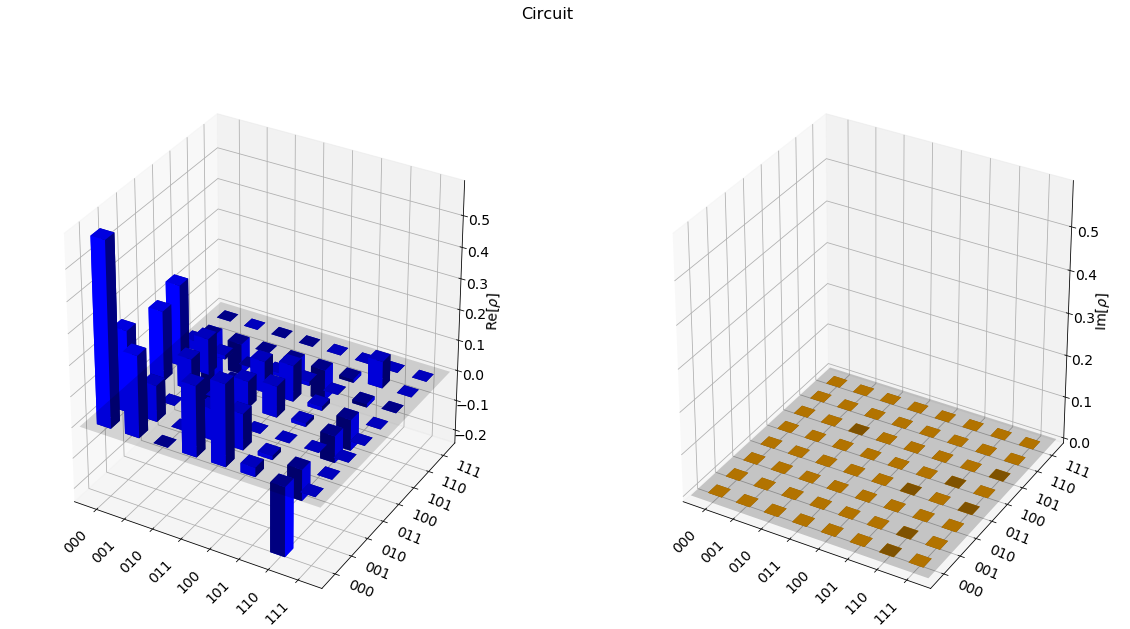

In [12]:
from qiskit.tools.visualization import plot_state_city, plot_bloch_multivector, plot_state_paulivec, plot_state_hinton, plot_state_qsphere
plot_state_city(rho_superposition, figsize=(20,10), title="Circuit", color=["blue", "orange"])
#plot_state(rho_superposition,’city’)

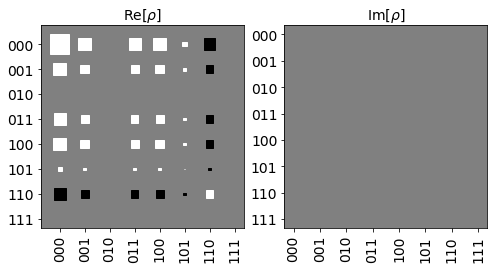

In [13]:
plot_state_hinton(state_superposition)

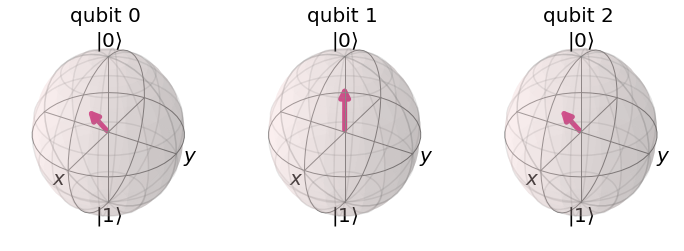

In [14]:
#Bloch state of the single qubits

plot_bloch_multivector(state_superposition)

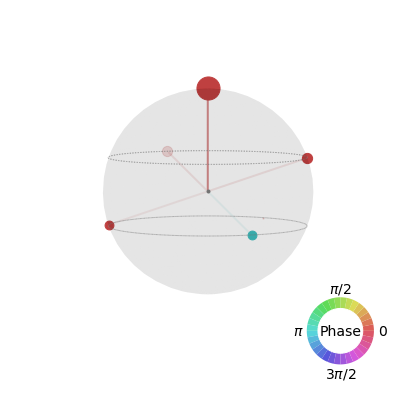

In [15]:
plot_state_qsphere(state_superposition)

In [55]:
# Define result dataframe
df_res = pd.DataFrame(columns=("I", "J","Annual Income_i","Annual Income_j","Spending Score_1_to_100_i","Spending Score_1_to_100_j","Theta_i", "Theta_j", "Quantum_Distance","ClassicDistance"))

#Define a loop to compute the distance between each pair of points

elements=20

#main cycle
for i in range(0,elements):
     for j in range(0,elements):
      # Set the parament theta about different point
       theta_1 = dataset.at[i,"Teta"]
       theta_2 = dataset.at[j,"Teta"]
    
    
ai_i = dataset.at[i,"Annual Income_k$"]
ai_j = dataset.at[j,"Annual Income_k$"]
sc_i = dataset.at[i,"Spending Score_1_to_100"]
sc_j = dataset.at[j,"Spending Score_1_to_100"] 
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit ( qr, cr, name="k_means")

# Compose the quantum circuit via qiskit
qc.h(qr[1])

qc.u3(theta_1, pi, pi, qr[0])
qc.u3(theta_2, pi, pi, qr[2])
qc.cswap(qr[1], qr[0], qr[2])
qc.h(qr[1])
qc.measure(qr[1], cr[1])

# eseguo il circuito costruito sulla coppia I,J
job_exp = execute(qc, backend=backend, shots=2048)
result = job_exp.result()

# calculate the ratio between the 0 and tha one result in measure registry
v1=result.get_counts(qc)["000"]     
if "010" in result.get_counts(qc):
  v2=result.get_counts(qc)["010"]     
else:
  v2=0
prob=v2/(v1+v2) # Probability of obtaining 1 that is “quantum distance”

# Classic distance calculation
cl_dist=math.sqrt(((ai_i-ai_j)**2)+((sc_i-sc_j)**2))

#Final output writing
df_res = df_res.append({"I":i, "J":j,"Annual Income_i":ai_i,"Annual Income_j":ai_j,"Spending Score_1_to_100_i":sc_i,"Spending Score_1_to_100_j":sc_j,
"Theta_i":theta_1, "Theta_j":theta_2, "Quantum_Distance":prob,"ClassicDistance":cl_dist} , ignore_index=True)
print("JOB Ended")

ValueError: At based indexing on an non-integer index can only have non-integer indexers

In [48]:
df_res.to_csv("QuantumDistances.csv",index=False)
df_res = pd.read_csv("QuantumDistances.csv")
dataset=df_res
dataset

,I,J,Annual Income_i,Annual Income_j,Spending Score_1_to_100_i,Spending Score_1_to_100_j,Theta_i,Theta_j,Quantum_Distance,ClassicDistance


In [43]:
#Calculation Correlation between Quantum and Classic Distance

cor=dataset["Quantum_Distance"].corr(dataset["ClassicDistance"],method="pearson")
print("{0:.0f}%".format(cor * 100))

nan%


/home/nicole/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/nicole/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


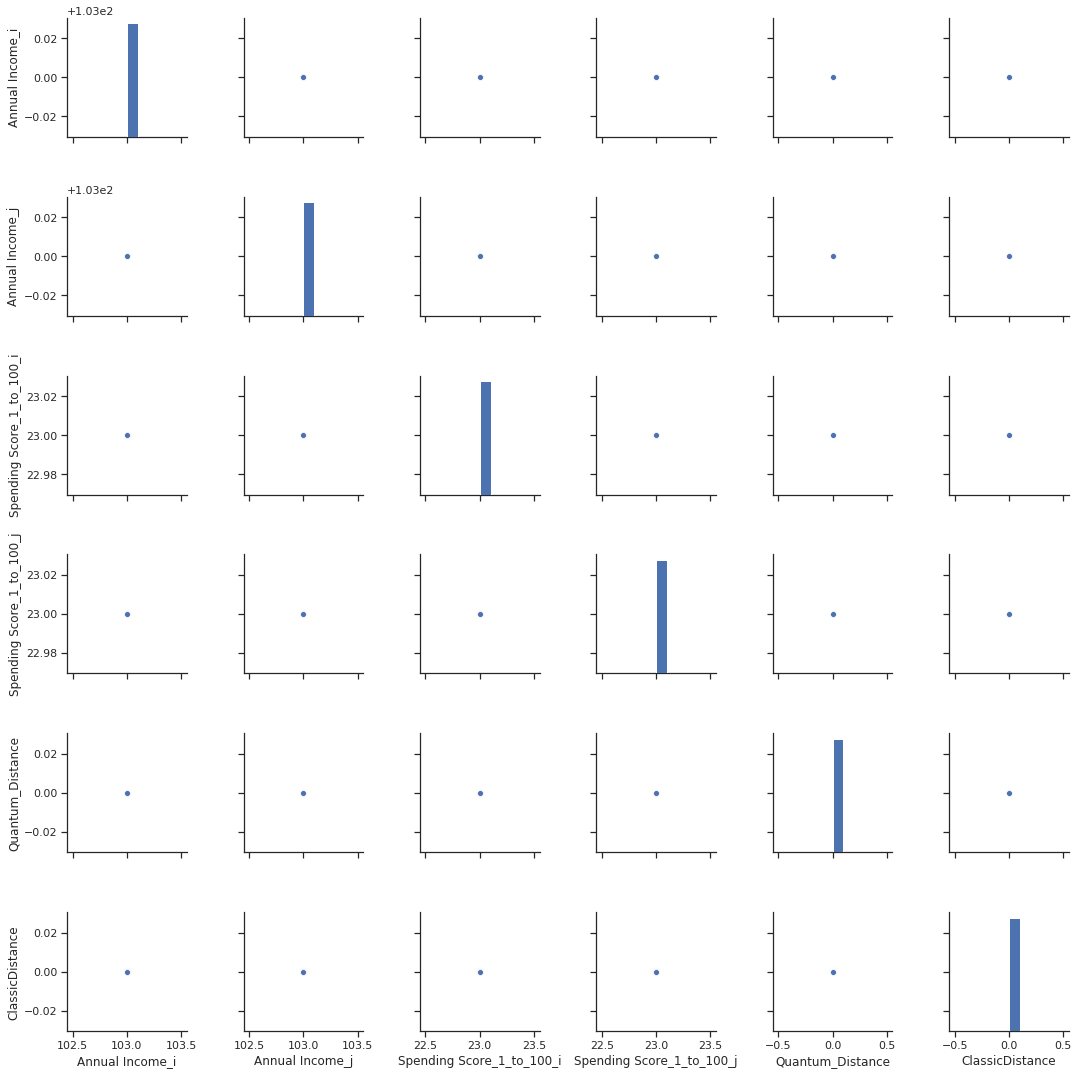

In [44]:
#Diagrams of correlation with Seaborn of a dataset with distances only

dataset.drop(["Theta_i","Theta_j","I","J"], axis=1, inplace=True)

# Determine the pairplot matrix for correlation verification
import seaborn as sns
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(dataset)

In [46]:
df_data_1 = pd.read_csv("Quantumnew2.csv")
df_data_1.head()
dataset=df_data_1
dataset=df_data_1
#dataset[‘Teta’]=np.arctan(dataset[‘Column2’].values.astype(int)/dataset[‘Column1’].values.astype(int))
dataset["Teta"]=np.arctan(dataset["Column2"].values/dataset["Column1"].values)
#dataset[‘ID’]=dataset.reset_index().index
dataset.head(10)

FileNotFoundError: [Errno 2] File b'Quantumnew2.csv' does not exist: b'Quantumnew2.csv'